# Kapazität des Binären Symmetrischen Auslöschungskanals (BSEC)

## Beschreibung des binären symmetrischen Auslöschungskanals

Der binäre symmetrische Auslöschungskanal (BSEC) hat einen binären Eingang $x \in \{X_0,X_1\}$ und einen ternären Ausgang $y \in \{Y_0,Y_1,Y_2\}$. Unter der Annahme $Y_0=X_0$ und $Y_1=X_1$ repräsentiert das dritte Ausgangssymbol $Y_2$ eine Auslöschung. Eine Auslöschung enthält keine Information über das gesendete Symbol $x$. Auslöschungen unterscheiden sich in einem wichtigen Punkt von Fehlern: ihre Positionen sind dem Empfänger bekannt (Positionen der Symbole $Y_2$), die von Fehlern nicht. Der BSEC wird durch zwei Koeffizienten parametrisiert, die Fehlerwahrscheinlichkeit $P_e$ und die Auslöschwahrscheinlichkeit $P_q$. Aufgrund seiner Symmetrie lautet die Likelihood-Funktion beim BSEC

\begin{align}
    \Pr \{ y \mid x \} 
    &= \begin{cases}
            1 - P_e - P_q & \text{ for } y = x \\
            P_e & \text{ for } y \neq x \wedge y \neq Y_2 \\
            P_q & \text{ for } y = Y_2 
       \end{cases} \\
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \begin{cases}
             P_0 (1-P_e-P_q) + (1-P_0) P_e & \text{ for } y = Y_0 \\
             P_0 P_e + (1-P_0) (1-P_e-P_q) & \text{ for } y = Y_1 \\
             P_0 P_q + (1-P_0) P_q = P_q & \text{ for } y = Y_2 
        \end{cases} \\
    &= \begin{cases}
         P_0 (1-P_e) + (1-P_0)P_e - P_0P_q & \text{ for } y = Y_0 \\
         P_0 P_e + (1-P_0)(1-P_e) - (1-P_0)P_q & \text{ for } y = Y_1 \\
         P_q & \text{ for } y = Y_2 .
        \end{cases}
\end{align}

Für gleichwahrscheinliche Eingangssymbole ($P_0=1/2$) lautet die Ausgangsverteilung

\begin{align}
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \begin{cases}
         \frac{1}{2} (1-P_q) & \text{ for } y = Y_0 \\
         \frac{1}{2} (1-P_q) & \text{ for } y = Y_1 \\
         P_q & \text{ for } y = Y_2 .
        \end{cases}
\end{align}

## Transinformation und Kanalkapazität

Die Transinformation eines Kommunikationskanals ist zu

\begin{align}
    I({\cal X};{\cal Y}) 
    &= H({\cal X}) - H({\cal X} \mid {\cal Y})
     = H({\cal Y}) - H({\cal Y} \mid {\cal X})
     = H({\cal X}) + H({\cal Y}) - H({\cal X}, {\cal Y}) \\
    &= \sum_x \Pr \{ {\cal X}=x \} \cdot \sum_y \Pr \{ {\cal Y}=y \mid {\cal X}=x \} \cdot 
        \log_2 \frac{ \Pr \{ {\cal Y}=y \mid {\cal X}=x \} }{ \Pr \{ {\cal Y}=y \} }
\end{align}

definiert. Aufgrund der strengen Symmetrie des BSEC maximiert die Gleichverteilung der Eingangssymbole mit $P_0=0.5$ die Transinformation und erreicht damit die Kanalkapazität. Nach einer kurzen Umformung erhalten wir

\begin{align}
    C &= (1 - P_q) \cdot \left[ 1 - H_2 \left( \frac{P_e}{1-P_q} \right) \right] \; .
\end{align}


## AWGN-Kanal mit quantisiertem Ausgang

Ein BSEC entsteht beispielsweise bei einer binären BPSK-Übertragung über einen AWGN-Kanal mit anschließender ternärer Quantisierung des Kanalausgangs. Dabei wird das Intervall $[-a,a]$ als Auslöschintervall definiert und durch das Symbol $Y_2$ repräsentiert. Werte kleiner als $-a$ und größer als $+a$ mit $a \geq 0$ werden den Symbolen $Y_0$ bzw. $Y_1$ zugeordnet. Die Wahrscheinlichkeiten $P_e$ und $P_q$ des BSEC können dann durch Integration der Normalverteilung des Rauschens über die entsprechenden Amplitudenbereich ermittelt werden. Der Parameter $a$ ist für jedes SNR zu optimieren. Für einen gegebenen Wert $a$ lauten die Wahrscheinlichkeiten

\begin{align}
    P_e &= \frac{1}{2} \cdot \mathrm{erfc} \left( (1+a) \sqrt{SNR} \right) \\
    P_q &= \frac{1}{2} \cdot \left[ \mathrm{erfc} \left(  (1-a) \sqrt{SNR} \right) - \mathrm{erfc} \left( (1+a) \sqrt{SNR} \right) \right] .
\end{align}

Die Abbildung unten zeigt die erreichbare Transinformation über dem Parameter $a$ für verschiedene SNR-Werte in dB. Die optimalen Werte von $a$ sind durch Marker gekennzeichnet. Offensichtlich hängt der optimale Wert für $a$ vom SNR ab. Für kleine SNR ist $a$ groß zu wählen, da die Unsicherheit sehr hoch ist. Die Übertragung ist sehr fehlerbehaftet und ein großer Auslöschbereich maximimiert die Transinformation. Für hohe SNR ist der optimale Wert für $a$ hingegen klein. Hier ist die Übertragung sehr zuverlässig und die meisten Entscheidungen sind korrekt. Daher reicht ein kleines Auslöschintervall aus, dessen Breite für SNR$\to \infty$ gegen Null strebt. Für diesen asymptotischen Fall führt der Empfänger immer eine harte Entscheidung durch und der BSEC wird zum BSC. 

/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_84083/943542340.py:25: RuntimeWarning: divide by zero encountered in log2
  log1 = np.log2(ONES-Pe-Pq)
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_84083/943542340.py:27: RuntimeWarning: divide by zero encountered in log2
  log2 = np.log2(1-Pq)


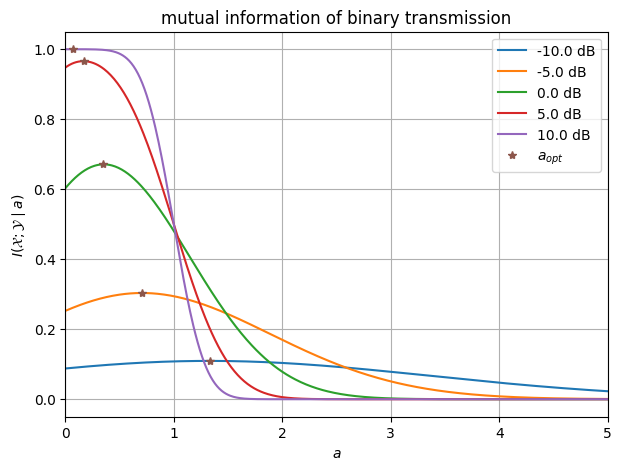

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp


# BPSK alphabet and a priori probabilities
BPSK = ([-1,+1],[0.5,0.5])

# threshold assuming x in {-1, +1}
a = np.linspace(0,5,501)  

# SNR of AWGN channel
SNRdB   = np.linspace(-20,10,61)
SNR = 10**(SNRdB/10)

# error probability of BSEC
Pe = 0.5 * sp.erfc(np.outer(np.ones(len(a))+a,np.sqrt(SNR)))

# erasure probability
Pq = 0.5 * (sp.erfc(np.outer(np.ones(len(a))-a,np.sqrt(SNR))) - sp.erfc(np.outer(np.ones(len(a))+a,np.sqrt(SNR))))
ONES = np.ones((len(a),len(SNRdB)))

# channel capacity as function of Pe and Pq
log1 = np.log2(ONES-Pe-Pq)
log1[np.isinf(log1)] = 0.0
log2 = np.log2(1-Pq)
log2[np.isinf(log2)] = 0.0
log3 = np.log2(Pe)
log3[np.isinf(log3)] = 0.0
C = ONES - Pq + (ONES-Pe-Pq)*log1 - (1-Pq)*log2 + Pe*log3

pos = np.argmax(C,axis=0)
Copt = np.max(C,axis=0)
            
ptr = np.linspace(20,60,5,dtype=int,endpoint=True)

fig1 = plt.figure(figsize=(7,5))
ax1 = fig1.add_subplot(111)
for run in np.arange(len(ptr)):
    ax1.plot(a, C[:,ptr[run]], '-', label=str(SNRdB[ptr[run]])+' dB')
ax1.plot(a[pos[ptr]], C[pos[ptr],ptr], '*', label='$a_{opt}$')
#plt.legend()
plt.grid(True)
plt.xlabel('$a$')
plt.ylabel('$I({\cal X};{\cal Y} \mid a)$')
plt.title('mutual information of binary transmission')
plt.xlim([0, 5])
plt.legend()
plt.show()   


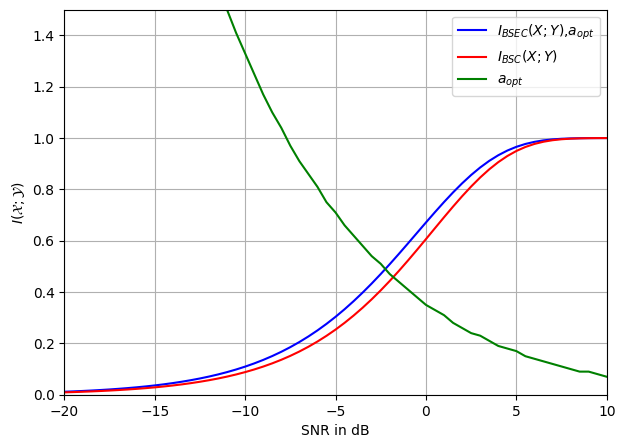

In [2]:
fig2 = plt.figure(figsize=(7,5))
ax2 = fig2.add_subplot(111)
ax2.plot(SNRdB, Copt, 'b-', label='$I_{BSEC}(X;Y)$,$a_{opt}$')
ax2.plot(SNRdB, C[1,:], 'r-', label='$I_{BSC}(X;Y)$')
ax2.plot(SNRdB, a[pos], 'g-', label='$a_{opt}$')
plt.grid(True)
plt.xlabel('SNR in dB')
plt.ylabel('$I({\cal X};{\cal Y})$')
plt.xlim(-20, 10)
plt.ylim(0, 1.5)
plt.legend()
plt.show()   


The figure above illustrates the optimal $a$ and the mutual information versus the signal to noise ratio. Again, it becomes obvious that $a$ decreases for growing SNR. Moreover, the benefit of the BSEC by allowing erasures compared to the BSC with simple hard decisions can be observed. It vanishes for large SNR. 